In [0]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline

Utilizaremos un dataset de ventas de un e-commerce. Echamos un vistazo a los datos que contiene el dataset.



In [0]:
ventas = pandas.read_csv('https://raw.githubusercontent.com/aguvilte/diplodatos/master/AnalisisYCuracion/retail_sales.csv')
ventas

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,79.69
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,152.27
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,192.15
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,158.54
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,156.86
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,78.71


Definimos la función para la normalización zscore. Las variables del dataset que vamos a utilizar son: Product_Category_1 y Purchase

In [0]:
def zscore_norm(x):
  return (x-x.mean())/x.std()

In [0]:
ventas['Product_Category_1_Norm'] = zscore_norm(ventas['Product_Category_1'])
ventas['Purchase_Norm'] = zscore_norm(ventas['Purchase'])

El algoritmo K-Means no es invariante ante cambios de medida en las variables. Cuando las variables vayan en unidades distintas conviene estandarizarlas, para evitar que el resultado del algoritmo dependa de cambios irrelevantes en la escala de medida.



Observamos la dispersión de los datos

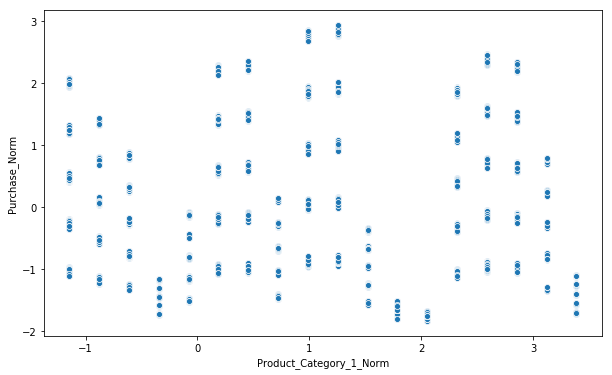

In [0]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=ventas, x=ventas['Product_Category_1_Norm'], y=ventas['Purchase_Norm'])

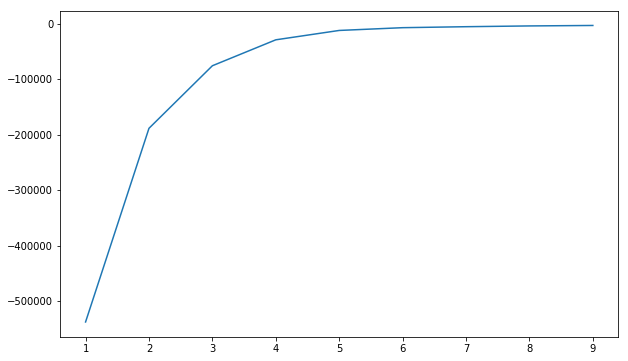

In [0]:
X = np.array(ventas['Product_Category_1_Norm'])
y = np.array(ventas['Purchase_Norm'])

num_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]

X = X.reshape(-1, 1)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.figure(figsize=(10,6))
sns.lineplot(data=ventas, x=num_clusters, y=score)
plt.xlabel('Número de clusters')
plt.ylabel('Score')

Existen distintos métodos para definir el número de clusters. Uno de ellos es el método del codo.  Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a N Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide.  Una vez obtenidos los valores de la inercia tras aplicar el K-means de 1 a N Clusters, representamos en una gráfica lineal la inercia respecto del número de Cluster

In [0]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.2394455 ]
 [ 2.02605526]
 [-1.05253362]]


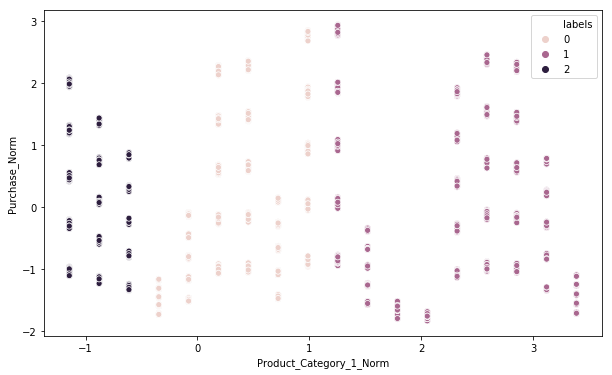

In [0]:
labels = kmeans.predict(X)
ventas['labels'] = labels

plt.figure(figsize=(10,6))
sns.scatterplot(data=ventas, x=ventas['Product_Category_1_Norm'], y=ventas['Purchase_Norm'], hue=ventas['labels'])